In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import shutup 
shutup.please()

sea = pd.read_csv("https://github.com/asbates/bayes-time-series/raw/master/data/gilbralter_time_series_r_2.csv")
sea.head()

,timeIdx,0,startDate,10,20,30,40,50,60,70,80,90
0,0,17.16350,2004-01-01,17.137667,17.127000,17.122334,17.116666,17.085334,17.039666,16.984666,16.838000,16.560000
1,1,17.15525,2004-02-04,17.032250,17.006500,16.961750,16.912250,16.861750,16.794250,16.767000,16.650750,16.523500
2,2,17.30200,2004-03-09,17.124001,17.025333,16.929000,16.789750,16.735750,16.669250,16.756800,16.703000,16.580000
3,3,17.50700,2004-04-12,17.124556,17.100000,17.046555,16.983000,16.920889,16.810111,16.737333,16.669111,16.575333
4,4,18.60500,2004-05-15,18.383000,17.914000,17.564889,17.295556,17.043333,16.841333,16.706000,16.540555,16.395778


<AxesSubplot:>

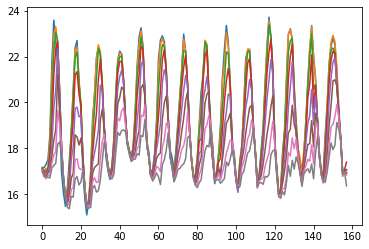

In [2]:
sea['0'].plot()
sea['10'].plot()
sea['20'].plot()
sea['30'].plot()
sea['40'].plot()
sea['50'].plot()
sea['60'].plot()
sea['70'].plot()

In [3]:
df = pd.DataFrame()

In [4]:
df["tIndex"] = sea["timeIdx"]
df["Date"] = sea["startDate"]
df[0] = sea['0'].diff()
df[10] = sea['10'].diff()
df[20] = sea['20'].diff()
df[30] = sea['30'].diff()
df[40] = sea['40'].diff()
df[50] = sea['50'].diff()
df[60] = sea['60'].diff()
df[70] = sea['70'].diff()
df[80] = sea['80'].diff()
df[90] = sea['90'].diff()

In [5]:
df.drop(0, inplace = True)

In [6]:
df.head()

,tIndex,Date,0,10,20,30,40,50,60,70,80,90
1,1,2004-02-04,-0.008250,-0.105416,-0.120500,-0.160583,-0.204416,-0.223584,-0.245416,-0.217666,-0.187250,-0.036500
2,2,2004-03-09,0.146750,0.091750,0.018834,-0.032750,-0.122500,-0.126000,-0.125000,-0.010201,0.052250,0.056500
3,3,2004-04-12,0.205000,0.000555,0.074667,0.117555,0.193250,0.185139,0.140861,-0.019466,-0.033889,-0.004667
4,4,2004-05-15,1.098000,1.258444,0.814000,0.518333,0.312556,0.122444,0.031222,-0.031333,-0.128556,-0.179555
5,5,2004-06-17,3.113333,2.687333,2.309555,1.407361,0.814945,0.601542,0.512917,0.440875,0.485302,0.457365


In [7]:
df.Date = pd.to_datetime(df.Date)

<AxesSubplot:>

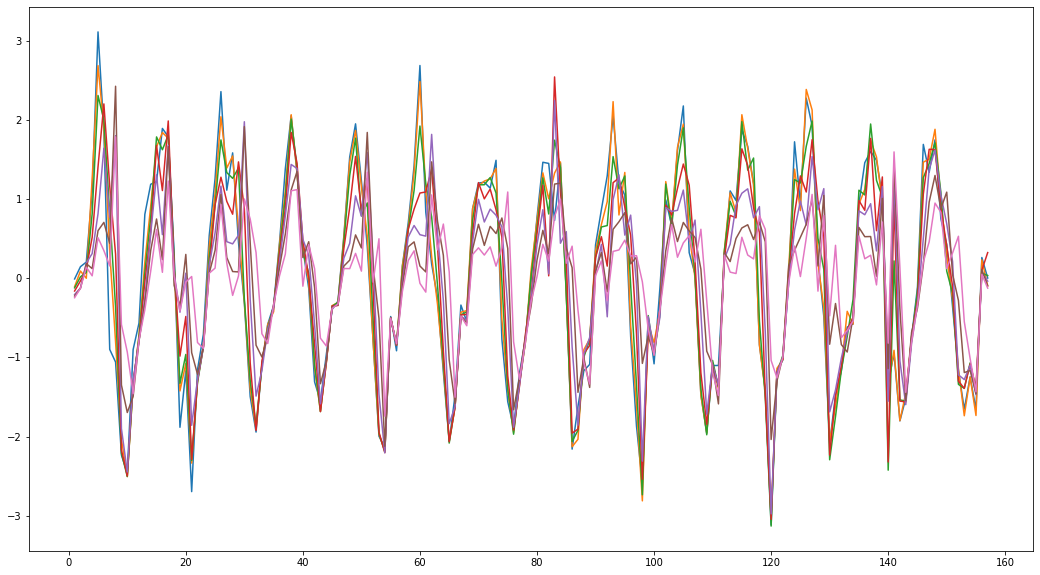

In [8]:
plt.figure(figsize = (18,10))
df[0].plot()
df[10].plot()
df[20].plot()
df[30].plot()
df[40].plot()
df[50].plot()
df[60].plot()

In [9]:
import statsmodels as sm
import statsmodels.tsa.seasonal as smts

In [10]:
df.drop("tIndex", axis = 1, inplace = True)

In [11]:
df.dtypes

Date    datetime64[ns]
0              float64
10             float64
20             float64
30             float64
40             float64
50             float64
60             float64
70             float64
80             float64
90             float64
dtype: object

In [12]:
nf = df[["Date", 0]]

In [13]:
nf.dtypes

Date    datetime64[ns]
0              float64
dtype: object

In [14]:
#results = smts.seasonal_decompose(nf)

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [16]:
nf

,Date,0
1,2004-02-04,-0.008250
2,2004-03-09,0.146750
3,2004-04-12,0.205000
4,2004-05-15,1.098000
5,2004-06-17,3.113333
...,...,...
153,2017-11-29,-1.652296
154,2018-01-01,-1.245199
155,2018-02-04,-1.657750
156,2018-03-10,0.262677


In [17]:
train = nf[:126]
test = nf[126:]

In [18]:
my_order = (2,0,3)
my_seasonal_order = (1,1,1,11)
model = SARIMAX(train[0], order = my_order, seasonal_order=my_seasonal_order).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  126
Model:             SARIMAX(2, 0, 3)x(1, 1, [1], 11)   Log Likelihood                 -78.545
Date:                              Sun, 27 Mar 2022   AIC                            173.090
Time:                                      17:12:05   BIC                            195.049
Sample:                                           0   HQIC                           182.003
                                              - 126                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2507      0.312     -0.804      0.422      -0.862       0.361
ar.L2          0.6689      0.254      2.637      0.008       0.172       1.166
ma.L1         -0.0279      0.812     -0.034      0.973      -1.619       1.563
ma.L2         -0.9372      0.811     -1.155      0.248      -2.528       0.653
ma.L3         -0.0305      0.139     -0.220      0.826      -0.303       0.242
ar.S.L11       0.1599      0.154      1.037      0.300      -0.142       0.462
ma.S.L11      -0.7651      0.147     -5.209      0.000      -1.053      -0.477
sigma2         0.2071      0.144      1.439      0.150      -0.075       0.489
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.45
Prob(Q):                              0.94   Prob(JB):                         0.80
Heteroskedasticity (H):               0.53   Skew:                             0.10
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
mod = SARIMAX(nf[0], order = my_order, seasonal_order=my_seasonal_order)
fit_res = mod.fit(disp=False, maxiter=250)
res = mod.filter(fit_res.params)
# In-sample one-step-ahead predictions
predict = res.get_prediction()
predict_ci = predict.conf_int()

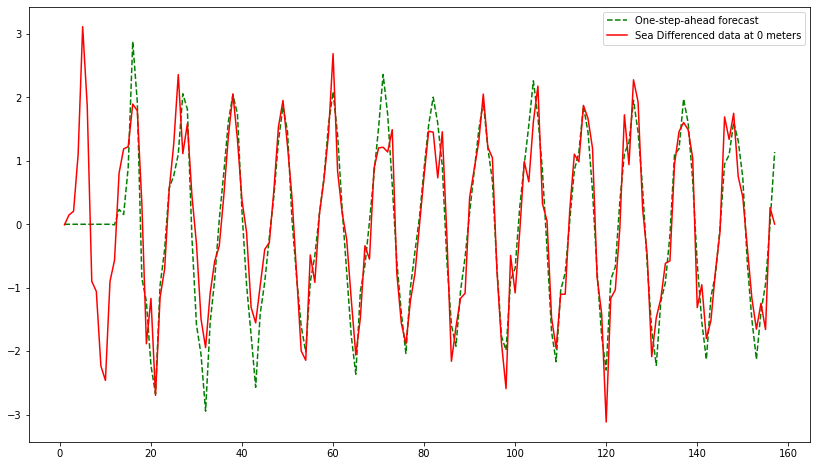

In [21]:
fig, ax = plt.subplots(figsize=(14,8))

predict.predicted_mean.plot(ax=ax, style='g--', label='One-step-ahead forecast')
df[0].plot(ax=ax, style='r', label='Sea Differenced data at 0 meters')

legend = ax.legend(loc='upper right')

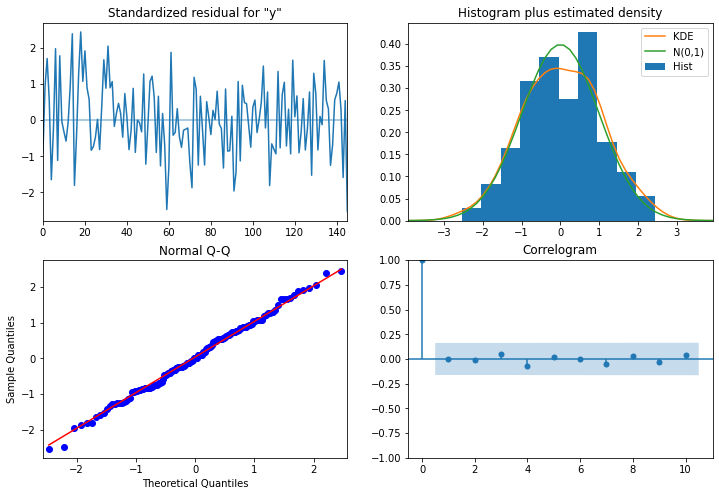

Ljung-box p-values:
[0.936537   0.93297295 0.76632939 0.88180668 0.94275508 0.97578706
 0.93460095 0.96417676 0.98228073 0.99077369 0.98887772 0.45668524
 0.3817597  0.45801774 0.35422516 0.40202338 0.28295262 0.27359723
 0.3304147  0.3588525  0.40559176 0.45392838]


In [22]:
fit_res.plot_diagnostics(figsize=(12, 8))
plt.show()
print("Ljung-box p-values:\n" + str(model.test_serial_correlation(method='ljungbox')[0][1]))

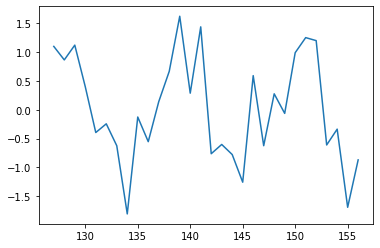

In [23]:
predictions = model.forecast(len(test))
residuals = test[0] - predictions
plt.plot(residuals)

In [24]:
predictions_df = pd.DataFrame(predictions)
predictions_df["Date"] = test["Date"]

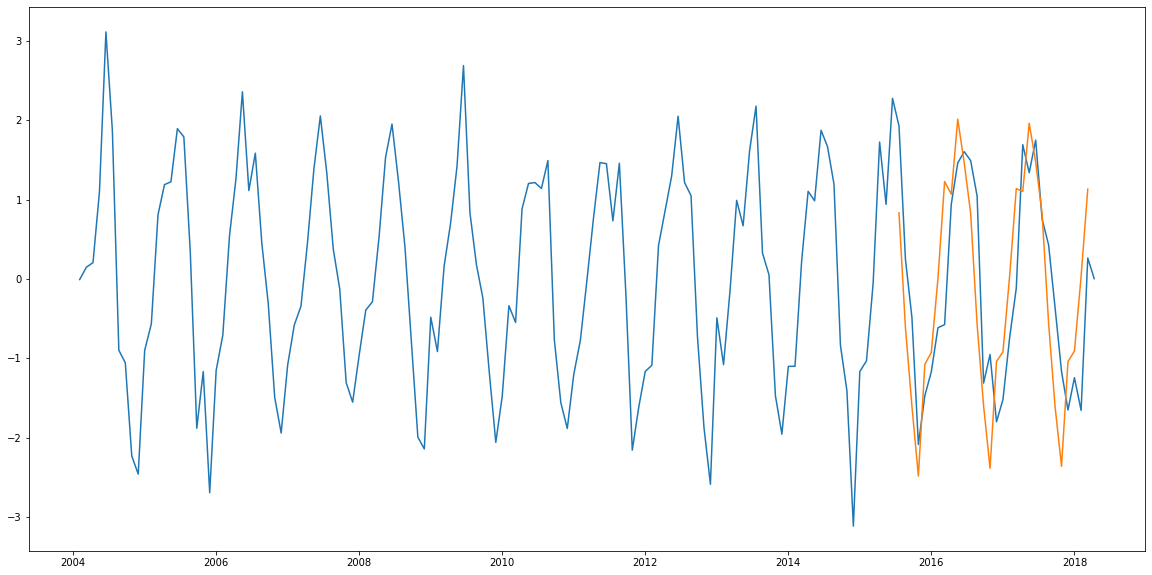

In [25]:
plt.figure(figsize=(20,10))
plt.plot(nf["Date"], nf[0])
plt.plot(predictions_df["Date"], predictions_df["predicted_mean"])

In [26]:
print(np.mean(abs(residuals/test[0])))

1.3657201789810165


In [27]:
#RMSE
print(np.sqrt(np.mean(residuals**2)))

0.9080199469421811


# ADDITIONAL VARIABLES

In [29]:
train_df = df[:126]
test_df = df[126:]

In [30]:
my_order = (2,0,3)
my_seasonal_order = (1,0,1,11)
model = SARIMAX(train_df[0], exog=train_df[[10,20,30,40,50,60,70,80,90]], order = my_order, seasonal_order=my_seasonal_order).fit()

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  126
Model:             SARIMAX(2, 0, 3)x(1, 0, [1], 11)   Log Likelihood                  39.560
Date:                              Sun, 27 Mar 2022   AIC                            -45.121
Time:                                      17:12:09   BIC                              3.096
Sample:                                           0   HQIC                           -25.532
                                              - 126                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
10             1.2705      0.125     10.147      0.000       1.025       1.516
20            -0.0393      0.224     -0.176      0.861      -0.478       0.400
30            -0.3702      0.178     -2.080      0.038      -0.719      -0.021
40             0.1096      0.155      0.709      0.478      -0.193       0.413
50             0.0353      0.182      0.194      0.846      -0.321       0.391
60             0.0998      0.238      0.419      0.675      -0.367       0.566
70            -0.1781      0.154     -1.156      0.248      -0.480       0.124
80            -0.2034      0.258     -0.788      0.431      -0.709       0.303
90             0.3153      0.173      1.824      0.068      -0.024       0.654
ar.L1         -0.2122      0.269     -0.788      0.431      -0.740       0.315
ar.L2          0.5510      0.146      3.775      0.000       0.265       0.837
ma.L1         -0.1295      0.366     -0.354      0.724      -0.847       0.588
ma.L2         -0.9715      0.224     -4.333      0.000      -1.411      -0.532
ma.L3          0.1120      0.216      0.518      0.605      -0.312       0.536
ar.S.L11      -0.2919      0.306     -0.955      0.340      -0.891       0.307
ma.S.L11       0.6410      0.304      2.112      0.035       0.046       1.236
sigma2         0.0298      0.005      6.264      0.000       0.020       0.039
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                51.58
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                            -0.41
Prob(H) (two-sided):                  0.22   Kurtosis:                         6.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

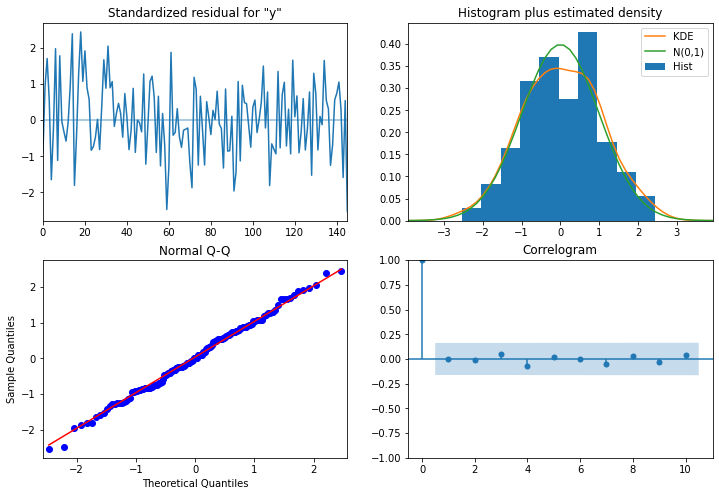

In [32]:
fit_res.plot_diagnostics(figsize=(12, 8))
plt.show()
# print("Ljung-box p-values:\n" + str(model.test_serial_correlation(method='ljungbox')[0][1]))

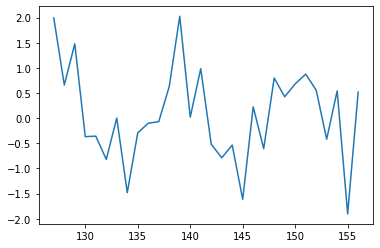

In [33]:
predictions = model.forecast(len(test_df), exog=test_df[[10,20,30,40,50,60,70,80,90]])
residuals = test_df[0] - predictions
plt.plot(residuals)

In [34]:
predictions_df = pd.DataFrame(predictions)
predictions_df["Date"] = test_df["Date"]

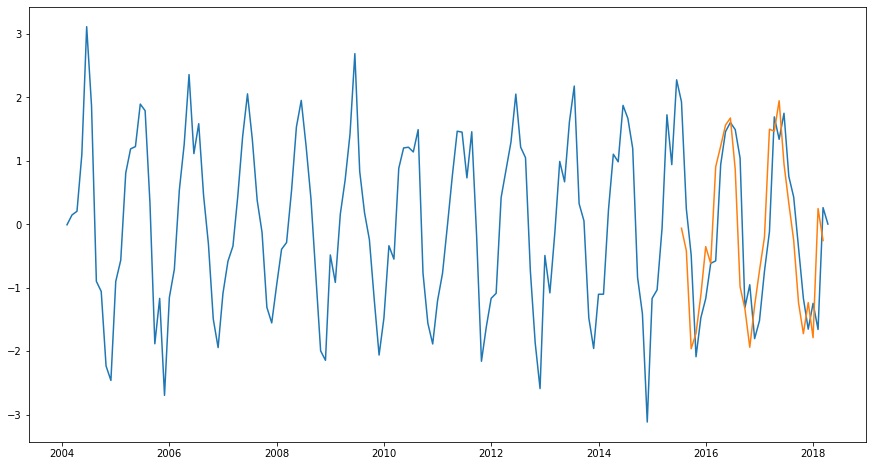

In [44]:
plt.figure(figsize=(15,8))
plt.plot(df["Date"], df[0])
plt.plot(predictions_df["Date"], predictions_df["predicted_mean"])

In [36]:
model = SARIMAX(df[0], exog=df[[10,20,30,40,50,60,70,80,90]], order = my_order, seasonal_order=my_seasonal_order)
fit_res = model.fit(disp=False, maxiter=250)
res = model.filter(fit_res.params)
# In-sample one-step-ahead predictions
predict = res.get_prediction()
predict_ci = predict.conf_int()

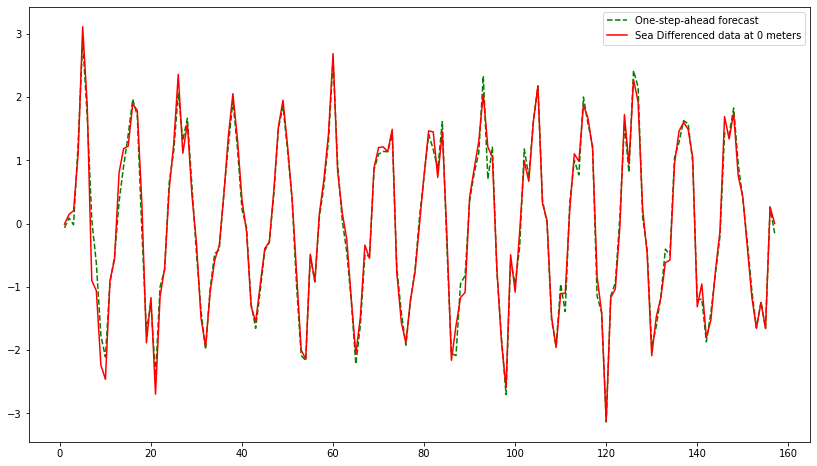

In [37]:
fig, ax = plt.subplots(figsize=(14,8))

predict.predicted_mean.plot(ax=ax, style='g--', label='One-step-ahead forecast')
df[0].plot(ax=ax, style='r', label='Sea Differenced data at 0 meters')

legend = ax.legend(loc='upper right')

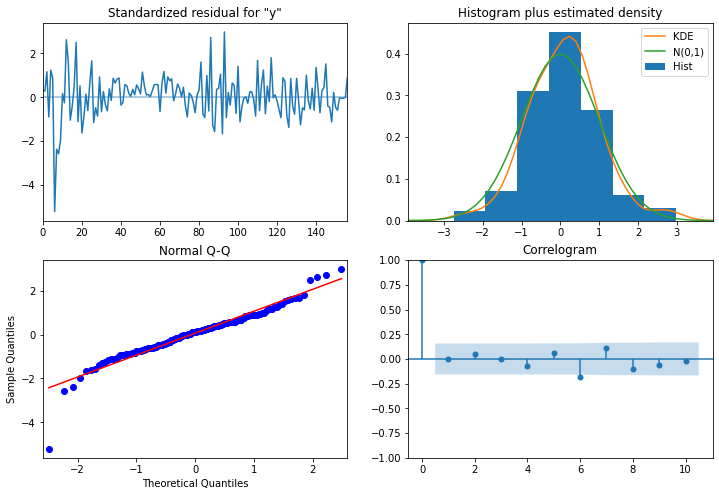

In [41]:
fit_res.plot_diagnostics(figsize=(12, 8))
plt.show()

In [38]:
#MAPE
print(np.mean(abs(residuals/test[0])))

1.3205088417659177


In [39]:
#RMSE
print(np.sqrt(np.mean(residuals**2)))

0.9348990715686628
